# Example: Krige a map using a user-defined correlation model

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import geostats

## Switch from Python to Cython backend

In [4]:
print('geostats_tools implementation: {}'.format(geostats.geostats_tools.__implementation__))
print('matrix builder implementation: {}'.format(geostats.build_Mrho.__implementation__))

geostats_tools implementation: Python
matrix builder implementation: Python


In [5]:
geostats.geostats_tools.select_backend('Cython')
geostats.build_Mrho.select_backend('Cython')

In [6]:
print('geostats_tools implementation: {}'.format(geostats.geostats_tools.__implementation__))
print('matrix builder implementation: {}'.format(geostats.build_Mrho.__implementation__))

geostats_tools implementation: Cython
matrix builder implementation: Cython


## Input

### Set an arbitrary study zone and earthquake epicenter

In [9]:
lat_min = 36.5
lat_max = 37.5
lon_min = -122.5
lon_max = -121.5
epi_lat = (lat_max+lat_min)/2
epi_lon = (lon_max+lon_min)/2

### Sampled locations

In [11]:
N_samp   = 10
samp_lat = np.random.uniform(lat_min,lat_max,N_samp)
samp_lon = np.random.uniform(lon_min,lon_max,N_samp)
samp_val = np.random.normal(0,1,N_samp)

### Unsampled locations

In [13]:
N_unsamp_lat = 20
N_unsamp_lon = 8
grid_lat     = np.linspace(lat_min,lat_max,N_unsamp_lat)
grid_lon     = np.linspace(lon_min,lon_max,N_unsamp_lon)

### Correlation structure

In [15]:
L_E     = 50
gamma_E = 1.25
sill    = 0.25

In [16]:
Mrho_sam = geostats.build_Mrho.MrhoE_sam2sam(samp_lat,samp_lon,L_E,gamma_E)
Mrho_uns = geostats.build_Mrho.MrhoE_sam2grid(samp_lat,samp_lon,grid_lat,grid_lon,L_E,gamma_E)

## Kriging

In [18]:
sampled   = geostats.Site(samp_lat,samp_lon,value=samp_val)
unsampled = geostats.Site(grid_lat,grid_lon)

In [19]:
Kriger = geostats.Kriging(sampled,unsampled,sill,None,epi_lat,epi_lon,Mrho_sam,Mrho_uns)
out    = Kriger.Krige('ordinary')

In [20]:
K_mean = out.mean
K_var  = out.variance

## Plotting

### Plot the mean Kriged values

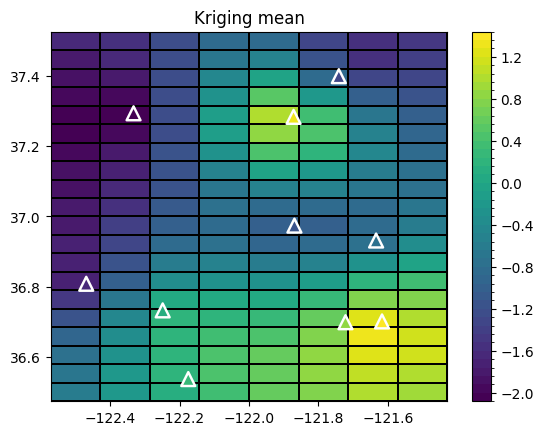

In [23]:
cmap    = plt.get_cmap('viridis')
val_min = min(samp_val.min(),K_mean.min())
val_max = max(samp_val.max(),K_mean.max())
levels  = MaxNLocator(50).tick_values(val_min,val_max)
norm    = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.figure()
m = plt.pcolormesh(grid_lon,grid_lat,K_mean.reshape(N_unsamp_lon,N_unsamp_lat).T,cmap=cmap,norm=norm,edgecolors='k',linewidth=0.01)
plt.scatter(samp_lon,samp_lat,c=samp_val,cmap=cmap,s=100,norm=norm,marker='^',edgecolor='w',linewidth=1.75)
cbar = plt.colorbar(m)
plt.title('Kriging mean');
plt.show()
plt.close()

### Plot the Kriging variance

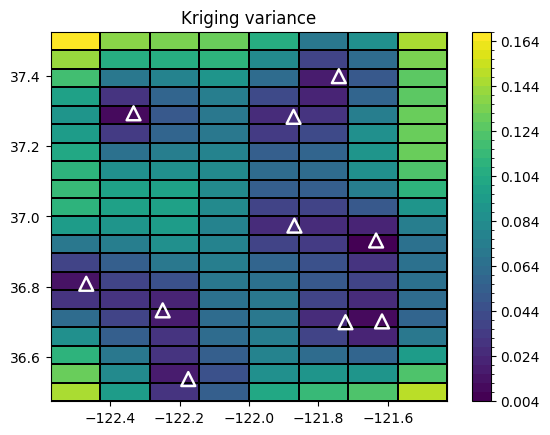

In [25]:
levels  = MaxNLocator(50).tick_values(K_var.min(),K_var.max())
norm    = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.figure()
m = plt.pcolormesh(grid_lon,grid_lat,K_var.reshape(N_unsamp_lon,N_unsamp_lat).T,cmap=cmap,norm=norm,edgecolors='k',linewidth=0.01)
plt.scatter(samp_lon,samp_lat,facecolor='None',s=100,marker='^',edgecolor='w',linewidth=1.75)
cbar = plt.colorbar(m)
plt.title('Kriging variance');
plt.show()
plt.close()